In [58]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)

In [60]:
hype = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/zoeb_playlist_hype.csv')
sakura = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/zoeb_playlist_sakura.csv')

In [61]:
hype

,Track URI,'Track URI,"'Track URI',",Track Name,Artist URI,Artist Name,Album URI,Album Name,Disc Number,Track Number,Track Duration (ms),Added By,Added At,Playlist
0,4dVpf9jZjcORqGTLUaeYj9,'4dVpf9jZjcORqGTLUaeYj9,"'4dVpf9jZjcORqGTLUaeYj9',",Plain Jane,spotify:artist:5dHt1vcEm9qb8fCyLcB3HL,A$AP Ferg,spotify:album:0tQ7Iu6EicQTPyhYRNWjaT,Still Striving,1,8,173600,spotify:user:kwanis_,2018-11-27T07:52:58Z,Hype
1,4X70hLzIDfY5T2BcsOcv6Q,'4X70hLzIDfY5T2BcsOcv6Q,"'4X70hLzIDfY5T2BcsOcv6Q',",REDMERCEDES,spotify:artist:3Gm5F95VdRxW3mqCn8RPBJ,Aminé,spotify:album:657XYEwejcZZ2rO0kutks8,REDMERCEDES,1,1,169706,spotify:user:kwanis_,2018-11-27T07:52:58Z,Hype
2,0pSBuHjILhNEo55xK1zrRt,'0pSBuHjILhNEo55xK1zrRt,"'0pSBuHjILhNEo55xK1zrRt',",Rolex,spotify:artist:27mFvqQj8KpjmdKIqcw1mG,Ayo & Teo,spotify:album:1bHj528aZfYOKq0ve5AHMr,Rolex,1,1,238586,spotify:user:kwanis_,2018-11-27T07:52:58Z,Hype
3,0SGkqnVQo9KPytSri1H6cF,'0SGkqnVQo9KPytSri1H6cF,"'0SGkqnVQo9KPytSri1H6cF',",Bounce Back,spotify:artist:0c173mlxpT3dSFRgMO8XPh,Big Sean,spotify:album:0XAIjjN5qxViVS0Y5fYkar,I Decided.,1,3,222360,spotify:user:kwanis_,2018-11-27T07:52:58Z,Hype
4,4QRWA5UqYU1st9aO0UfxOj,'4QRWA5UqYU1st9aO0UfxOj,"'4QRWA5UqYU1st9aO0UfxOj',",Fade Away,spotify:artist:4xRYI6VqpkE3UwrDrAZL8L,Logic,spotify:album:5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,1,2,287400,spotify:user:kwanis_,2018-11-27T07:52:58Z,Hype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1i0aEIsCWwsmN5pn0oatfN,'1i0aEIsCWwsmN5pn0oatfN,"'1i0aEIsCWwsmN5pn0oatfN',",Outta There,spotify:artist:4s03DfC6cLxCYirblvaKlO,Moe,spotify:album:1ZB3SAalE9o27Q8KvOTZGN,Rich Dreamin',1,5,156315,spotify:user:kwanis_,2020-07-09T05:49:21Z,Hype
173,5MD2QLnFM2ChpKAh33z0zr,'5MD2QLnFM2ChpKAh33z0zr,"'5MD2QLnFM2ChpKAh33z0zr',",Hercules,spotify:artist:50co4Is1HCEo8bhOyUWKpn,Young Thug,spotify:album:4sAB9WulPpnAcig7alDGTg,I'm Up,1,6,280831,spotify:user:kwanis_,2020-07-09T05:52:11Z,Hype
174,4Zjdzxx0dsavsr7Ehr8fGE,'4Zjdzxx0dsavsr7Ehr8fGE,"'4Zjdzxx0dsavsr7Ehr8fGE',",Prospect (ft. Lil Baby),"spotify:artist:6ASri4ePR7RlsvIQgWPJpS, spotify...","iann dior, Lil Baby",spotify:album:0EmINljXosug1gnqewNqnn,Prospect (feat. Lil Baby),1,1,226313,spotify:user:kwanis_,2020-07-09T05:52:22Z,Hype
175,2UYGC1AQpguCOBJRQUOeeU,'2UYGC1AQpguCOBJRQUOeeU,"'2UYGC1AQpguCOBJRQUOeeU',",Got It On Me,spotify:artist:0eDvMgVFoNV3TpwtrVCoTj,Pop Smoke,spotify:album:2MDU46hcBn3u94s46BOSdv,Shoot For The Stars Aim For The Moon (Deluxe),1,17,164579,spotify:user:kwanis_,2020-09-18T15:27:46Z,Hype


In [62]:
df_main

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [63]:
df = df_main[df_main['id'] == "4dVpf9jZjcORqGTLUaeYj9"]
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
97437,0.0651,['A$AP Ferg'],0.797,173600,0.844,1,4dVpf9jZjcORqGTLUaeYj9,0.0,11,0.087,-5.482,1,Plain Jane,76,2017-08-18,0.275,170.142,0.52,2017


In [64]:
tracks = ['4dVpf9jZjcORqGTLUaeYj9',
'4X70hLzIDfY5T2BcsOcv6Q',
'0pSBuHjILhNEo55xK1zrRt',
'0SGkqnVQo9KPytSri1H6cF',
'4QRWA5UqYU1st9aO0UfxOj',
'5NuhZIx47GxB5DAXg8jWHN',
'0cDQOoRyiDS4nxnnxZv9Rq',
'6d8MHAb3LSuAz42yyDM4q1',
'6Ius4TC0L3cN74HT7ENE6e',
'5KRodDC46zAvduTMh8E1sO',
'6eKWSrZfzd25TYYxkscWgg',
'4rgwri7LajWVZvdj2N81SS',
'1ZAyjvIk9YiD76yYy0TEG6',
'0tdCy39PgWN8LFWu34ORn3',
'2h5UTuSlrJ6CXwv2mJp8W2',
'790MhTXPFrYkrqCKvpg4t1',
'3VFZTYhwAsxTDTiHlm3n1k',
'4PPeA7dxbxHi1NyRS0e79S',
'6QVroOo2FAaXeslynLIKbz',
'6fujklziTHa8uoM5OQSfIo',
'6mapJIPnQ23RTAevUoE0DL',
'1e1JKLEDKP7hEQzJfNAgPl',
'0TlLq3lA83rQOYtrqBqSct',
'1BuZAIO8WZpavWVbbq3Lci',
'2KpCpk6HjXXLb7nnXoXA5O',
'1QRJb5VY3sIkCKcTuIKCrk',
'7GNlNNDvM7c9fsv3zsmVQX',
'6HicBL9RxtWwNK7sS2AHHU',
'5PjbVRRS1YxSJRb3ThSNnE',
'1eQBEelI2NCy7AUTerX0KS',
'7AzYw1R5bonXD7aEnIQZYm',
'4qKcDkK6siZ7Jp1Jb4m0aL',
'7GX5flRQZVHRAGd6B4TmDO',
'7floNISpH8VF4z4459Qo18',
'3vy5oyouE27J8lRMBWrLrB',
'3MnbXlC1N7GdS9M8HzA6no',
'3cCxoOgfi6hgt8MNteuiiD',
'79nEEoEPY2w8EXj9hjn5oc',
'2u7mxWSeoqTXndK5e08jMp',
'3ZhTT6yjZwpPph5MIJ53XY',
'5GpAhJpbHvUi6gY6RG15Ze',
'0XySogm94T51XF5F2jumXm',
'2ZJCiXNgleaoOP6zSWkzqy',
'2fQrGHiQOvpL9UgPvtYy6G',
'0wdKiSBUT7aZkXUIdJWcwC',
'10I3CmmwT0BkOVhduDy53o',
'3qN5qMTKyEEmiTZD38BNTT',
'5QR5cF8Kfjx81jmibbvRv0',
'7uuBfgY1vBCalrQRyyQhqs',
'2d8JP84HNLKhmd6IYOoupQ',
'29tc0GbW0pTSBZSCZF3NWk',
'0s3nnoMeVWz3989MkNQiRf',
'1xvUQPmgQ9EcBgVR5VocbX',
'4XaW4jIud5YxwV4QRJOb40',
'0VgkVdmE4gld66l8iyGjgx',
'4IowQDUOzUvNtp72HMDcKO',
'0w3Q3VFdrYzo24QUIGnBNy',
'6tpHfEM8eaETzlPOARYWfZ',
'0ZELoIgk0hbxK6rLX88tiu',
'4zGvb8hxGLB2jEPRFiRRqw',
'7gbcknTlXzxWp9QaYCW3BR',
'5PTG6rrL6EPFD9E2QMI2pl',
'2mJ1A5Z4v2F9WjBmf5asTw',
'7KXjTSCq5nL1LoYtL7XAwS',
'0IEhU1bRVEqWCfb6Fy6w67',
'2r10Ycf6ULu4TAE26g2T0q',
'0qy5D3OJre7SPJNMOL9I71',
'1AH60dMaEfNjzDoUIFwIQi',
'5ClmYd83GFMM8Unue3dqKJ',
'2rmq49FcJ4U3wh1Z7C9UxE',
'1Fse7gDm2QMoXJ0QXrjYWv',
'6xbraxG0bSBOuAr5IUXmtM',
'22nyEAEM29tcBRhukR089b',
'0grimyaxHH66oGelb2eHtM',
'0wwPcA6wtMf6HUMpIRdeP7',
'2INqEk4ko5AsGVLBsiKiQe',
'1xzBco0xcoJEDXktl7Jxrr',
'6umpNjuFvLRMievwEzmKih',
'3i01Zk9c0FQ5HA1WJjflXI',
'4hiNSVDrVkcrd0BrOME3HX',
'2EUNZfjPToKZIahK0WMLKd',
'3YeJXuRSNS5FYwOsDu44kD',
'0AcicReEGm1qcENjqzh1Tg',
'0AcicReEGm1qcENjqzh1Tg',
'2AJlEaACYHQMYxXlRMdLM6',
'2ikkgfIIM9kGKZCXzXnTpj',
'3BgL0IcxKAd0sukooPIVhA',
'1iPBD72u3nAyFEeardYuBV',
'6SAKXCj5jyF6IgPCPbZ5ra',
'63KKvdfkStMHQM4Ufzx2KB',
'49ax542eGoDclA2fzsLdI7',
'0asxiZ68X8m2wuJwsabF6d',
'2gQYziDV5cSTRSqr6akzi5',
'4dTba8JPyPWqrQ0tNqM4mk',
'1n8wr8tRHs5jmBxNWXedcn',
'4IWGnyOHDrVZEtPWfs4s7q',
'74lnM5V6ecvoTPV0fvptx9',
'32OkBQinMWqa7ZydEkHqVi',
'21kOVEG3bDCVphKhXL8XmQ',
'2e3oSed7fWKJ63VCxtMAAH',
'2WW3I9qsp8nTQD9XtTV9Zc',
'1psC5iHzQxaTMZ5dWGfM6I',
'2IRZnDFmlqMuOrYOLnZZyc',
'1oU2vrVzQxqoZJZSw80Ven',
'2zkCbezif5Vb2XeCyFaEwn',
'5IaHrVsrferBYDm0bDyABy',
'5VA7N9x2QXqtktUI61o3OG',
'5Cg98kiDYtCEHmjcKD0CJD',
'2xB64x7pRS8Qa9uuZktOnA',
'2BJSMvOGABRxokHKB0OI8i',
'09IOPhEh1OMe0HD9b36FJk',
'4uQ7wYsuL0DryknoDc11Hk',
'711MglQhnhOF3UAiAs9A59',
'0EwS8XJQspgrj1zSUXhFkl',
'2Vc6NJ9PW9gD9q343XFRKx',
'3FrRge0Vuju2vRiZOHEPGo',
'0c7K73roy6RW4ebDkf4yGh',
'1WIZiOuNO3woKfdlSK2gNn',
'0SfG57HqtBNqKN9O27fo1s',
'1O01cSag3DaCGneWQgPBL4',
'1GXKeYRrklN7AQE3oaFCfV',
'3XiNC94b4Tq1xwv70sQJGN',
'3HXSQWIyz7CUEI96kUurwn',
'4B0r8wQP0qfyDFaPs4Rjnz',
'6tk90xGswRjtelNN4Ef4WD',
'7bDaswZlpaAe8rPQOWHySn',
'4VcPtoOpK3oBMDZJ9Ptp9f',
'311TRQfl3MkFsFOW7iFMzL',
'6fTt0CH2t0mdeB2N9XFG5r',
'0u6XTfO6mgz3QeeujuBE6l',
'7kWOOLjhvTsfNFHdu9iWWl',
'1rsAFUCa6BVMgRQ3FCQQsi',
'2hJWZvTw4QVBwC14ZNs1Ib',
'08zAFXhfyIxq9359NHksdP',
'3S8hI4RwB6vQ8fgZZihtpv',
'3PPMgxFxHslb4Zq5TxPTY8',
'3OIEEwH67H60B6HQLLaZFK',
'4dAMdQ6g4kGmnc1MDHsg77',
'67XyC1GdSkKb9sbRRkUDXS',
'1h6OiyF7bf4jifbw1s7mVD',
'4sWuPniHClkInYAnzXAYUF',
'4IO8X9W69dIQe0EC5ALXhq',
'13LRpDmtzHCmWK4cL9iJ8N',
'2napy7uG4RI74SoyKJVGl5',
'3AEgic4yp82NxMWUjHtxnO',
'4dZTZbmJBCCofAExHwefda',
'0uATCc7skXRKGBYp4FHdBZ',
'0fySG6A6qLE8IvDpayb5bM',
'0sr5LOMv4x0jmTYfe6oOvP',
'4sjiIpEv617LDXaidKioOI',
'2gwkD6igEhQbDQegRCcdoB',
'67cpn8ZBO7QU67jky8Fh47',
'65mFuYYe8FBwBelMCGfhOV',
'6IlSNchcDRJTOHOU6tg1t3',
'0nbXyq5TXYPCO7pr3N8S4I',
'2EK77Jcm0Pvzd5nonAYOHX',
'0B07yE76kLxxdJoKoNNdni',
'4Exknuth94DX8UKqaoxKoj',
'6wJYhPfqk3KGhHRG76WzOh',
'6gi6y1xwmVszDWkUqab1qw',
'4z2JaAVPemYJhFKm7e32RA',
'74fV8TuLZKVzSIOOGu8wwI',
'1dtTRXifeGC51adYy0902s',
'1jaTQ3nqY3oAAYyCTbIvnM',
'6ZzDXVb1tqFH1b02OywsrK',
'5faPa9muv3aZiOQ33e0kE6',
'2A9rFFPwsnhusCh8ZMBvYY',
'4XUD2CnwseTFwKDlKLqT5j',
'1RDM6FhzmHMyXDtiU9f1jH',
'6V4KHt9xu4TPEnDFoBeacT',
'5qHirGR7M9tdm6C17DlzSY',
'7Ekuj4IetcyH8Y4xueKap8',
'1i0aEIsCWwsmN5pn0oatfN',
'5MD2QLnFM2ChpKAh33z0zr',
'4Zjdzxx0dsavsr7Ehr8fGE',
'2UYGC1AQpguCOBJRQUOeeU',
'6Js9pKLTyVw7xZQ1MIjkVo']
df_main.id.isin(tracks)
hype_tracks = df_main[df_main.id.isin(tracks)]
hype_tracks.shape

(100, 19)

In [65]:
hype_tracks

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7657,0.05180,['Kanye West'],0.777,200733,0.662,1,3MnbXlC1N7GdS9M8HzA6no,0.00000,1,0.1680,-3.761,0,Facts (Charlie Heat Version),60,2016-06-10,0.1430,142.059,0.400,2016
7704,0.03240,['Young Thug'],0.742,280831,0.559,1,5MD2QLnFM2ChpKAh33z0zr,0.00000,5,0.0987,-5.876,1,Hercules,57,2016-02-05,0.1410,146.923,0.431,2016
7782,0.00639,['Aminé'],0.816,169707,0.630,1,4X70hLzIDfY5T2BcsOcv6Q,0.03040,1,0.1730,-5.729,0,REDMERCEDES,62,2017-03-03,0.1830,101.997,0.599,2017
7930,0.20300,"['Smokepurpp', 'Murda Beatz', 'Lil Yachty', 'O...",0.878,157557,0.647,1,08zAFXhfyIxq9359NHksdP,0.00185,10,0.3350,-4.566,0,Do Not Disturb (feat. Lil Yachty & Offset),64,2018-04-13,0.0659,131.027,0.212,2018
15860,0.03040,['Lil Pump'],0.803,106021,0.789,1,1rsAFUCa6BVMgRQ3FCQQsi,0.00000,10,0.3780,-3.434,0,Boss,66,2017-10-06,0.0383,119.999,0.647,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161290,0.11300,"['No Jumper', 'Tay-K', 'BlocBoy JB']",0.886,138997,0.542,1,32OkBQinMWqa7ZydEkHqVi,0.00000,1,0.1510,-5.424,1,Hard (feat. Tay-K and BlocBoy JB),64,2018-03-22,0.3380,83.519,0.314,2018
161375,0.02950,"['DJ Scheme', 'Lil Yachty', 'Danny Towers', 'S...",0.949,135023,0.425,1,67cpn8ZBO7QU67jky8Fh47,0.00000,5,0.1060,-7.393,1,"How You Feel? (Freestyle) (feat. Lil Yachty, D...",66,2019-07-30,0.2240,124.927,0.621,2019
169078,0.13800,"['Chief Keef', 'Soulja Boy']",0.545,213238,0.826,1,0uATCc7skXRKGBYp4FHdBZ,0.00000,1,0.3380,-4.651,1,Save That Shit,51,2012-03-14,0.0491,140.020,0.487,2012
169137,0.08480,['Yung Lean'],0.601,154000,0.712,0,79nEEoEPY2w8EXj9hjn5oc,0.00000,1,0.4790,-9.433,1,Ginseng Strip 2002,59,2013-08-16,0.0431,114.998,0.386,2013


In [66]:
hype_tracks['playlist'] = 'Hype'

<ipython-input-66-86c2bdc6aefa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hype_tracks['playlist'] = 'Hype'


In [67]:
tracks2 = ['6o7phyVV9ywtZ48SUd9BbI',
'7qrBYrivpvfXUPBMmqh3dA',
'2COBMrpsGXEagCGkjp2Siz',
'2RycgtfFQZOPgEGrzBGE0j',
'4JLI9AgtAXutJvjlXgZBoR',
'4idh2MYeUKe5ZinwBUoT5v',
'7MdZQXUBijQxcBkYz4G1Z5',
'0BD9XqvXSSxlHsdBlLKhqA',
'3gV0E3N4uOcoNsbxLkGWkp',
'7woCxOw0jmj65ohlQ3x0tH',
'6ugrRFZUNIpLiqhLUgC7ix',
'7bIXxtS6oLDBNzrQpqHS62',
'1GK8IGST7h1RoDYl2x8981',
'2U42jVkNgEU6DoM64eFD7i',
'7JgZbix8xDasAhbn3N7eIF',
'0DvqAXyoA7zRB8wgH0DjRO',
'6xHlnkbGTtQaPvFJVIweaD',
'5cvbog6wen3r3bBbcwL16U',
'3NsuucK8qXpIJf7KPZX7vq',
'1k6WdNgK2EFLIr3opwgCpm',
'2uQvqa4rGcqdC0iP4LDGUq',
'23gcQr3NRKzLXsP9H5jFQ1',
'3F0mcxksBp33QrL6oyjvLN',
'34MqDD3411uJQvXsqpZv3D',
'1naqrWNoxyi6PEXz3NOXW0',
'3PqWJMsNn4yh9lFqBbYhuE',
'3QBmlOti4g3N3krkY9ces4',
'4Upt2O9SCYCVEqgsuzY71b',
'2QHadMVSzvtviJ7oMRytDi',
'6RyoC29FTgZAr2RV8Dp3Jn',
'5X4Lzt8rqH4ece29Moqlz5',
'4hnhSZTKf77tZjOBjzL5BM',
'19JzJOMs4wkuKxY8WEOMea',
'5p684vIzF5LOkmHL3I0tyM',
'5qC17VMNoZdF2gAw28FtsV',
'3A2jJaOKYhmKEy9IyyEJF6',
'10hweQwWcUhBcpipYEvCYD',
'4kVmLlBnLcfXIZIIhq3VUq',
'0JhdQlmssZgMtiXUjBFP6C',
'1SJkTuUNKe4rYQgX8wmqku',
'00iwQgjIgoGO94BRBDyClo',
'5s6QMzY5oeVaOVJJsb59Tj',
'1LnvvETuCo3vqt1xC9j7J4',
'24Jk4wYlLRXI9TUMdkHoMN',
'2v7yI88iezgRO9ka5gtUF1',
'7k6OEvolAy5WjWKAZRgBil',
'506O2O13slCAUEo6w8aqr8',
'28pUgp8Cifsnwrv5Mvltyz',
'37XpkZ67bAY9VgP7Ab7d4x',
'3bGIazLV2xUHJrEfLyr9rN',
'70AvqwCfLnKMj3HvJDCXyW',
'0ytvsZOerGzUWfHXVT2Sgy',
'00e1c7sY2YmpscKwKdddX0',
'7A0T4eb6jPhhQp3KQis6ww',
'6JmG3j8hS7NWRI4ZaM3Ffs',
'2xCr4G5ojdyvGDC5y96B9B',
'6M9ubKmLHAlnd83zu0M8pj',
'6bIWPTKhyncHLcaU9PuLLf',
'3pb9alcNVn5gq9kCBtAL2e',
'03Xacq2fba0uwwFg6rlM8a',
'1EebxBw5N5UC529NjVintP',
'299vmLW2iaQxe8y9HLWNiH',
'0T3AL6GpsAkydCNBZ9VguC',
'0A6dTlWYD2magT5bqUyZLM',
'1TP1jwwVd3erUk0T2VXI0z',
'3yHcL5EdK0ehUToqq2iuTz',
'0bZtfh0htctxJvOayjRszp']
sakura_tracks = df_main[df_main.id.isin(tracks2)]
sakura_tracks

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7678,0.3580,['Harris Cole'],0.635,206811,0.0861,0,1LnvvETuCo3vqt1xC9j7J4,0.009950,11,0.1380,-18.311,0,Game over!,60,2016-08-02,0.0755,130.146,0.0618,2016
7815,0.9430,['Rook1e'],0.532,96005,0.1370,0,10hweQwWcUhBcpipYEvCYD,0.824000,3,0.0852,-19.672,1,I Fell in Love with You One Night in September,64,2017-09-07,0.0648,89.346,0.0732,2017
15838,0.2040,['Saib'],0.643,99997,0.5600,0,3F0mcxksBp33QrL6oyjvLN,0.197000,0,0.0908,-7.295,1,Sakura Trees,65,2017-03-10,0.0354,79.986,0.5210,2017
15847,0.8600,['Kudasaibeats'],0.785,195000,0.2220,0,00iwQgjIgoGO94BRBDyClo,0.840000,8,0.1060,-21.624,1,The Girl I Haven't Met,64,2017-12-20,0.0418,139.885,0.3270,2017
23647,0.7790,"['o k h o', 'Saito']",0.713,95143,0.3030,0,4idh2MYeUKe5ZinwBUoT5v,0.003360,11,0.4650,-12.477,1,Long Espresso,58,2015-11-04,0.1100,76.022,0.8120,2015
23679,0.9000,['weird inside'],0.510,173846,0.2130,0,299vmLW2iaQxe8y9HLWNiH,0.048700,6,0.0978,-6.717,0,just ask,57,2015-05-22,0.1760,77.976,0.1730,2015
23725,0.7990,['Joey Pecoraro'],0.760,127530,0.4440,0,70AvqwCfLnKMj3HvJDCXyW,0.606000,2,0.3520,-5.546,1,Your Eyes,58,2015-08-14,0.1350,92.590,0.3420,2015
23907,0.9670,['Elijah Who'],0.614,65790,0.2770,0,23gcQr3NRKzLXsP9H5jFQ1,0.891000,1,0.0698,-11.943,0,my new love,63,2017-09-29,0.0420,84.938,0.2360,2017
31814,0.9670,['eevee'],0.645,86571,0.1140,0,2U42jVkNgEU6DoM64eFD7i,0.831000,9,0.1120,-15.768,1,viola,59,2016-02-10,0.3560,78.015,0.1910,2016
39877,0.1870,['Idealism'],0.660,113000,0.5280,0,4hnhSZTKf77tZjOBjzL5BM,0.943000,11,0.1740,-8.139,1,Both of Us,64,2017-07-31,0.1090,84.938,0.5320,2017


In [68]:
sakura_tracks['playlist'] = 'Sakura'

<ipython-input-68-55d323fd4a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sakura_tracks['playlist'] = 'Sakura'


In [69]:
df2 = hype_tracks.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'playlist']]
df2.reset_index(drop = True)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,playlist
0,0.05180,0.777,0.662,0.00000,1,0.1680,-3.761,0.1430,142.059,0.400,Hype
1,0.03240,0.742,0.559,0.00000,5,0.0987,-5.876,0.1410,146.923,0.431,Hype
2,0.00639,0.816,0.630,0.03040,1,0.1730,-5.729,0.1830,101.997,0.599,Hype
3,0.20300,0.878,0.647,0.00185,10,0.3350,-4.566,0.0659,131.027,0.212,Hype
4,0.03040,0.803,0.789,0.00000,10,0.3780,-3.434,0.0383,119.999,0.647,Hype
...,...,...,...,...,...,...,...,...,...,...,...
95,0.11300,0.886,0.542,0.00000,1,0.1510,-5.424,0.3380,83.519,0.314,Hype
96,0.02950,0.949,0.425,0.00000,5,0.1060,-7.393,0.2240,124.927,0.621,Hype
97,0.13800,0.545,0.826,0.00000,1,0.3380,-4.651,0.0491,140.020,0.487,Hype
98,0.08480,0.601,0.712,0.00000,1,0.4790,-9.433,0.0431,114.998,0.386,Hype


In [70]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
x = df2.loc[:, features].values

In [71]:
y = df2.loc[:,['playlist']].values

In [72]:
x = StandardScaler().fit_transform(x)

In [81]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,-0.498426,-0.098984,0.243291,-0.115084,-0.972125,-0.190391,1.471456,-0.503290,0.395921,-0.382456
1,-0.659840,-0.401291,-0.486652,-0.115084,0.051164,-0.673001,0.313118,-0.518298,0.573533,-0.222676
2,-0.876251,0.237872,0.016512,0.297693,-0.972125,-0.155570,0.393627,-0.203132,-1.066969,0.643226
3,0.759604,0.773388,0.136988,-0.089965,1.330276,0.972610,1.030576,-1.081844,-0.006920,-1.351442
4,-0.676481,0.125587,1.143317,-0.115084,1.330276,1.272065,1.650546,-1.288953,-0.409615,0.890627


In [82]:
pca = PCA(n_components = 2)

In [83]:
principalComponents = pca.fit_transform(x)

In [84]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [85]:
principalDf

,principal component 1,principal component 2
0,-0.930406,0.844523
1,-0.070096,0.651886
2,0.105942,-0.249999
3,-0.321212,1.001087
4,-2.110582,-0.213361
...,...,...
95,1.304911,-0.109180
96,1.557344,-1.146666
97,-2.433757,1.595273
98,-0.270694,1.172425


In [86]:
principalDf['playlist'] = 'Hype'

In [87]:
principalDf

,principal component 1,principal component 2,playlist
0,-0.930406,0.844523,Hype
1,-0.070096,0.651886,Hype
2,0.105942,-0.249999,Hype
3,-0.321212,1.001087,Hype
4,-2.110582,-0.213361,Hype
...,...,...,...
95,1.304911,-0.109180,Hype
96,1.557344,-1.146666,Hype
97,-2.433757,1.595273,Hype
98,-0.270694,1.172425,Hype


In [88]:
df3 = sakura_tracks.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'playlist']]
df3.reset_index(drop = True)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,playlist
0,0.3580,0.635,0.0861,0.009950,11,0.1380,-18.311,0.0755,130.146,0.0618,Sakura
1,0.9430,0.532,0.1370,0.824000,3,0.0852,-19.672,0.0648,89.346,0.0732,Sakura
2,0.2040,0.643,0.5600,0.197000,0,0.0908,-7.295,0.0354,79.986,0.5210,Sakura
3,0.8600,0.785,0.2220,0.840000,8,0.1060,-21.624,0.0418,139.885,0.3270,Sakura
4,0.7790,0.713,0.3030,0.003360,11,0.4650,-12.477,0.1100,76.022,0.8120,Sakura
5,0.9000,0.510,0.2130,0.048700,6,0.0978,-6.717,0.1760,77.976,0.1730,Sakura
6,0.7990,0.760,0.4440,0.606000,2,0.3520,-5.546,0.1350,92.590,0.3420,Sakura
7,0.9670,0.614,0.2770,0.891000,1,0.0698,-11.943,0.0420,84.938,0.2360,Sakura
8,0.9670,0.645,0.1140,0.831000,9,0.1120,-15.768,0.3560,78.015,0.1910,Sakura
9,0.1870,0.660,0.5280,0.943000,11,0.1740,-8.139,0.1090,84.938,0.5320,Sakura


In [89]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
x = df3.loc[:, features].values

In [90]:
y = df3.loc[:,['playlist']].values

In [91]:
x = StandardScaler().fit_transform(x)

In [92]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,-1.279955,-0.555841,-1.409127,-1.601891,1.337673,-0.185978,-1.245213,-0.406295,1.075230,-1.661704
1,0.839741,-1.437799,-1.088400,0.643430,-0.827347,-0.778237,-1.545423,-0.525887,-0.318363,-1.609446
2,-1.837960,-0.487340,1.576970,-1.085967,-1.639230,-0.715421,1.184699,-0.854487,-0.638070,0.443291
3,0.538998,0.728563,-0.552806,0.687562,0.525791,-0.544923,-1.975996,-0.782955,1.407882,-0.446015
4,0.245502,0.112049,-0.042415,-1.620067,1.337673,3.481987,0.041652,-0.020693,-0.773467,1.777248


In [93]:
pca = PCA(n_components = 2)

In [94]:
principalComponents = pca.fit_transform(x)

In [95]:
sakuradf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [96]:
sakuradf

,principal component 1,principal component 2
0,-1.394522,1.915753
1,-2.991715,-0.165480
2,1.523338,0.873741
3,-1.884448,-0.344152
4,2.180707,1.279178
5,-0.468533,0.802750
6,1.409446,0.905800
7,-1.509807,-0.656695
8,-1.210987,-1.084657
9,2.230735,0.228370


In [97]:
sakuradf['playlist'] = 'Lofi'

In [98]:
sakuradf

,principal component 1,principal component 2,playlist
0,-1.394522,1.915753,Lofi
1,-2.991715,-0.165480,Lofi
2,1.523338,0.873741,Lofi
3,-1.884448,-0.344152,Lofi
4,2.180707,1.279178,Lofi
5,-0.468533,0.802750,Lofi
6,1.409446,0.905800,Lofi
7,-1.509807,-0.656695,Lofi
8,-1.210987,-1.084657,Lofi
9,2.230735,0.228370,Lofi


In [99]:
dfs = [principalDf, sakuradf]
total = pd.concat(dfs)

In [100]:
total

,principal component 1,principal component 2,playlist
0,-0.930406,0.844523,Hype
1,-0.070096,0.651886,Hype
2,0.105942,-0.249999,Hype
3,-0.321212,1.001087,Hype
4,-2.110582,-0.213361,Hype
...,...,...,...
30,0.894445,-1.505678,Lofi
31,0.384520,-0.899596,Lofi
32,3.543601,1.365350,Lofi
33,0.230116,-0.547248,Lofi


<Figure size 1152x720 with 0 Axes>

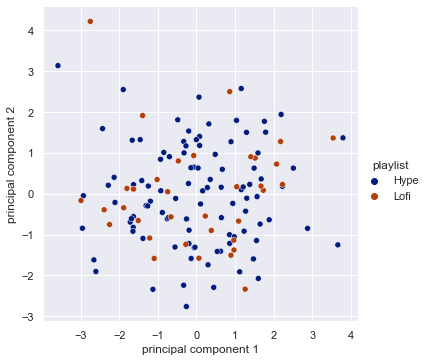

In [101]:
plt.figure(figsize=(16, 10))
sns.set_theme(style = "darkgrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'playlist', palette = "dark", data = total)